In [14]:
!pip install yfinance



In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = yf.download('RELIANCE.NS', start='2022-01-01', end='2024-12-31')
df.head()

/tmp/ipython-input-660136966.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('RELIANCE.NS', start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2022-01-03,1098.149048,1100.022110,1079.738882,1080.401299,5421611
2022-01-04,1122.932129,1124.256963,1098.217641,1103.654004,10847728
2022-01-05,1128.185547,1131.566145,1111.442782,1124.713718,11643813
2022-01-06,1103.928101,1121.059231,1100.501826,1119.780073,14447422
2022-01-07,1112.836182,1122.909222,1101.666685,1110.529201,13112115


In [17]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()
df.tail()

Price,Close,High,Low,Open,Volume,SMA20,SMA50
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,
Date,,,,,,,
2024-12-23,1222.300049,1227.199951,1213.199951,1215.000000,10052824,1277.287506,1299.569507
2024-12-24,1222.750000,1233.550049,1221.000000,1222.300049,6734917,1273.640009,1296.582507
2024-12-26,1216.550049,1227.699951,1214.250000,1224.250000,10016178,1269.807513,1293.463008
2024-12-27,1221.050049,1227.900024,1217.000000,1218.300049,7000397,1267.320013,1291.003508
2024-12-30,1210.699951,1223.199951,1208.099976,1216.400024,8818766,1263.245013,1288.136008


In [18]:
def generate_signals(data):
    buy = []
    sell = []
    flag = False

    for i in range(len(data)):
        if data['SMA20'].iloc[i] > data['SMA50'].iloc[i] and not flag:
            buy.append(data['Close'].iloc[i])
            sell.append(None)
            flag = True
        elif data['SMA20'].iloc[i] < data['SMA50'].iloc[i] and flag:
            sell.append(data['Close'].iloc[i])
            buy.append(None)
            flag = False
        else:
            buy.append(None)
            sell.append(None)
    return buy, sell

df['Buy'], df['Sell'] = generate_signals(df)


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  offsets = np.asanyarray(offsets, float)


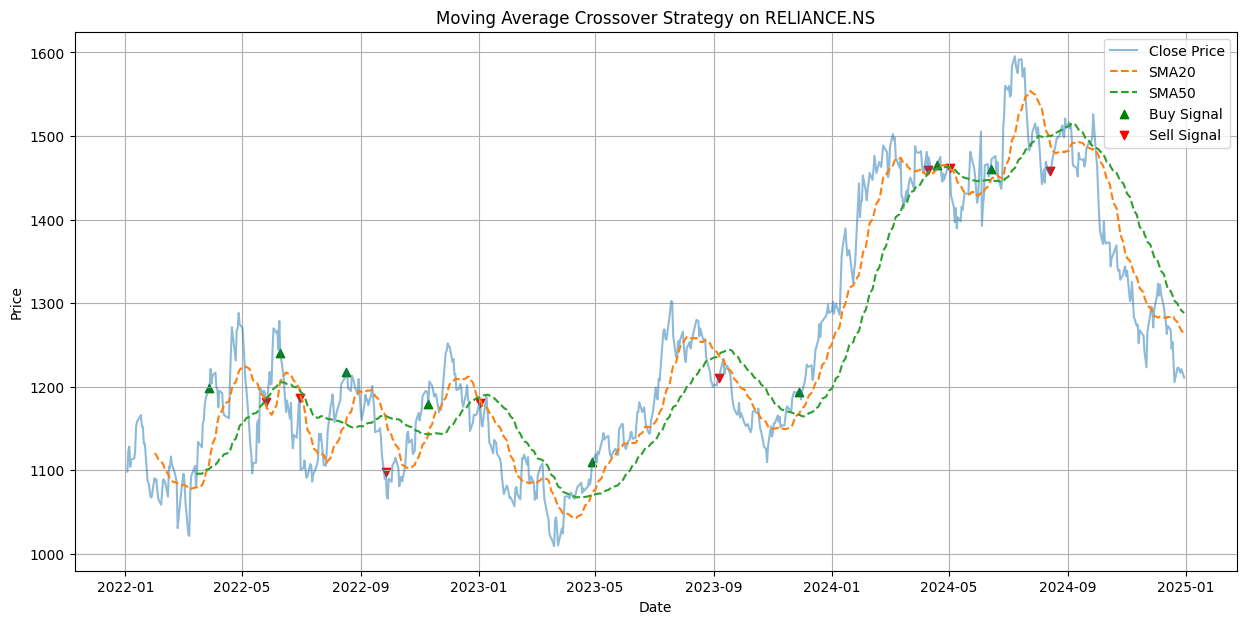

In [19]:
plt.figure(figsize=(15,7))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA20'], label='SMA20', linestyle='--')
plt.plot(df['SMA50'], label='SMA50', linestyle='--')
plt.scatter(df.index, df['Buy'], label='Buy Signal', marker='^', color='green')
plt.scatter(df.index, df['Sell'], label='Sell Signal', marker='v', color='red')
plt.title('Moving Average Crossover Strategy on RELIANCE.NS')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
!pip install --upgrade gspread gspread_dataframe


In [21]:
import gspread
from gspread_dataframe import set_with_dataframe
from google.colab import auth
auth.authenticate_user()

import pandas as pd
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)


In [22]:

trades = df[df['Buy'].notnull() | df['Sell'].notnull()]
trades = trades[['Close', 'SMA20', 'SMA50', 'Buy', 'Sell']]
sheet = gc.create("AlgoTrading Signals – Reliance")
worksheet = sheet.get_worksheet(0)
set_with_dataframe(worksheet, trades)


In [23]:
print("Google Sheet Link:", "https://docs.google.com/spreadsheets/d/1ODxB_nV7r0q_WB21IxrqLkxtSu6ToI9iR-9kQHKxLwg/edit?usp=sharing")

Google Sheet Link: https://docs.google.com/spreadsheets/d/1ODxB_nV7r0q_WB21IxrqLkxtSu6ToI9iR-9kQHKxLwg/edit?usp=sharing
